붓꽃 데이터 실습

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 붓꽃 데이터 읽어와서 확인하기

1. 데이터 파일 읽어오기

In [3]:
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


2. 데이터의 기본 정보 출력

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


3. 데이터의 기초 통계량 출력

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


4. 품종별 개수 구하기

In [6]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# 붓꽃 데이터 전처리

1. 결측치 확인하기

In [7]:
df.isna()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


2. 중복 데이터 확인하기

In [8]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


3. 중복데이터 모두 확인하기

In [9]:
df[df.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


4. 중복데이터 삭제하기

In [10]:
dfm = df.drop_duplicates()
dfm

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 붓꽃 데이터 그룹핑

1. 품종(species) 열을 기준으로 합계 구하기

In [11]:
dfm.groupby('species').sum()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,323.6,146.0,272.5,99.4


2. 품종(species) 열을 기준으로 평균 구하기

In [12]:
dfm.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


# 붓꽃 데이터 시각화

1. 막대 그래프 그리기

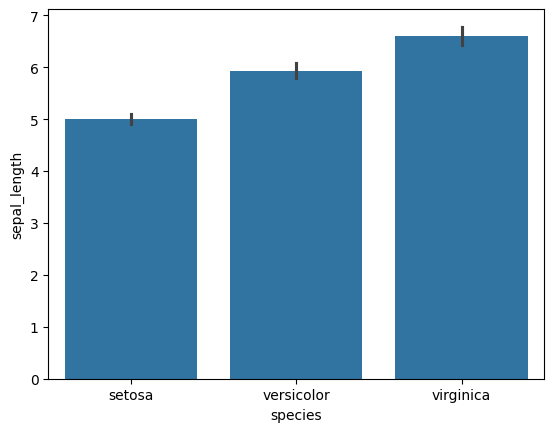

In [13]:
# 꽃받침 길이의 시각화
sns.barplot(x='species', y='sepal_length', data=dfm)
plt.show()

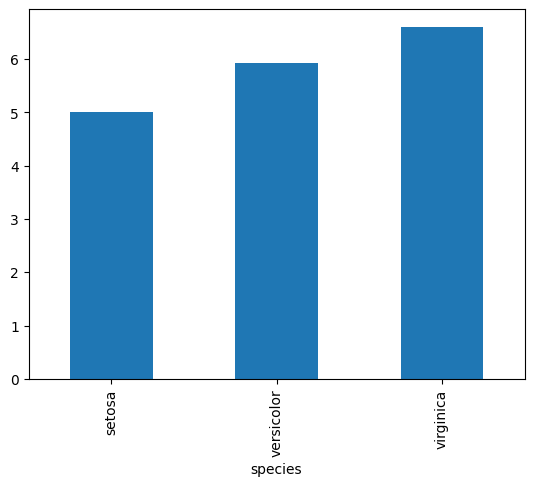

In [14]:
# 붓꽃 종류별 꽃받침 길이의 평균에 대한 시각화
dfm.groupby('species')['sepal_length'].mean().plot(kind='bar')
plt.show()

2. 히스토그램 그래프 그리기

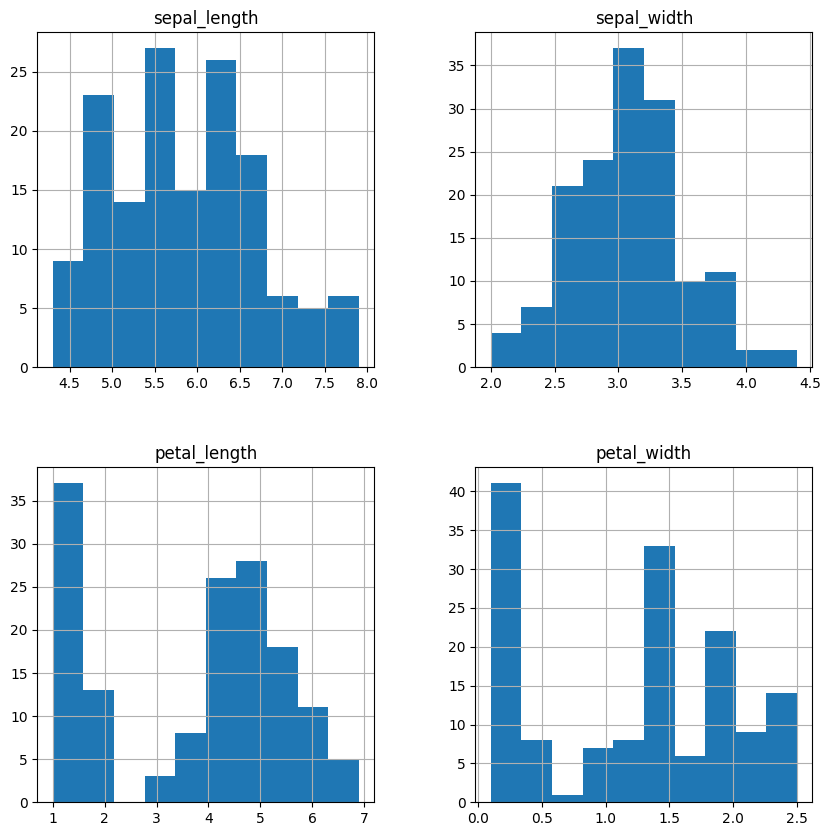

In [15]:
# 각 특징(4가지) 값들의 빈도수에 대한 시각화
dfm.hist(figsize=(10,10))
plt.show()

3. 산점도 그래프 그리기

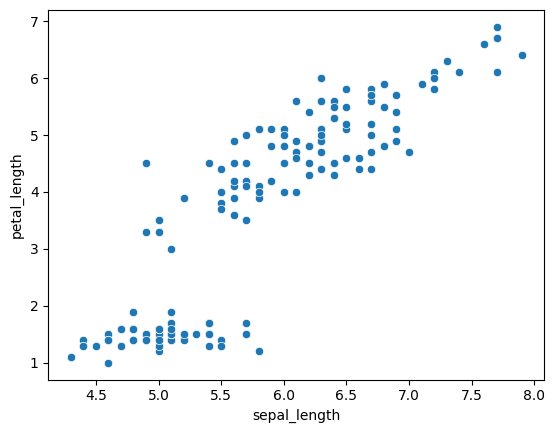

In [16]:
# 꽃받침의 길이와 꽃잎의 길이의 산점도를 시각화
sns.scatterplot(x='sepal_length', y='petal_length', data=dfm)
plt.show()